### **Experimento 1 - LAB_2_B com o KNN**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns



Tarefa:

Carregue a base de dados wine do scikit-learn no formato de data frame link

visualize as primeiras 7 linhas do dataframe

visualize as estatísticas descritivas da base de dados wine

Separe os dados em 2 subconjuntos (treinamento e teste)

Calcule as acurácias (conjunto de teste) para valores de k de 1 a 11 utilizando as distancias: 'euclidean', 'cityblock', 'chebyshev'

Gere os 3 gráficos (para as distâncias) da variação da acurácia com o parâmetro k

Selecione o melhor modelo

Treine o melhor modelo, calcule a matriz de confusão e gere a sua figura

Aplique ambas normalizações de atributos e repita os itens 4-7 (calcule os parâmtros da normalização usando Xtrain e aplique tal normalização nos subconjuntos X_train e X_test).

Compile seus resultados em no relatório 1 (inclua as figuras e o código em PDF)

In [ ]:
# Carregando o dataset e printando
wine = load_wine(as_frame=True)
df = wine.frame



print(f'Atributos: {wine.feature_names}')
print(f'Classes: {wine.target_names}')
display(df)

Atributos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (124, 13)
X_test: (54, 13)
y_train: (124,)
y_test: (54,)


Com o conjunto de teste e de treinamento já definidos, irei aplicar o modelo KNN com diferentes métricas

In [ ]:
best_k_euclidean = 0
best_acc_euclidean = 0
k_values = list(range(1, 12))
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'k = {k}: Acurácia = {acc:.2f}')
    accuracies.append(acc)
    if acc > best_acc_euclidean:
        best_acc_euclidean = acc
        best_k_euclidean = k
best_accuracies['Euclidean'] = best_acc_euclidean


k = 1: Acurácia = 0.76
k = 2: Acurácia = 0.67
k = 3: Acurácia = 0.70
k = 4: Acurácia = 0.76
k = 5: Acurácia = 0.72
k = 6: Acurácia = 0.72
k = 7: Acurácia = 0.78
k = 8: Acurácia = 0.65
k = 9: Acurácia = 0.72
k = 10: Acurácia = 0.70
k = 11: Acurácia = 0.70


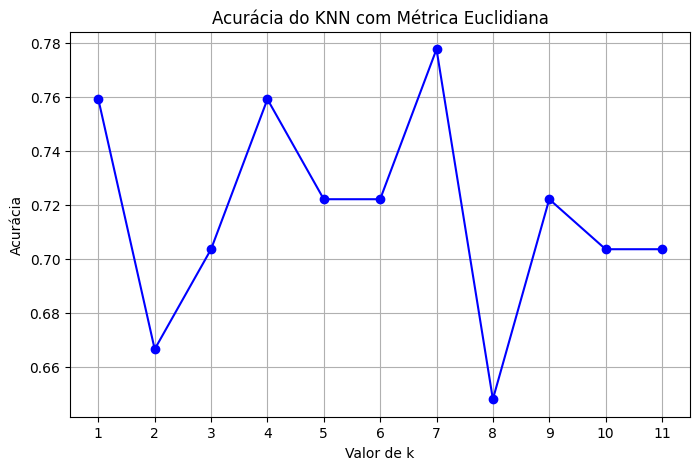

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Acurácia do KNN com Métrica Euclidiana')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

K=7 foi o que resultou numa melhor acurácia


In [ ]:
best_k_cityblock = 0
best_acc_cityblock = 0
k_values = list(range(1, 12))
accuracies_cityblock = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'k = {k}: Acurácia = {acc:.2f}')
    accuracies_cityblock.append(acc)
    if acc > best_acc_cityblock:
        best_acc_cityblock = acc
        best_k_cityblock = k

best_accuracies['Cityblock'] = best_acc_cityblock

k = 1: Acurácia = 0.83
k = 2: Acurácia = 0.72
k = 3: Acurácia = 0.80
k = 4: Acurácia = 0.83
k = 5: Acurácia = 0.78
k = 6: Acurácia = 0.80
k = 7: Acurácia = 0.78
k = 8: Acurácia = 0.74
k = 9: Acurácia = 0.76
k = 10: Acurácia = 0.74
k = 11: Acurácia = 0.72


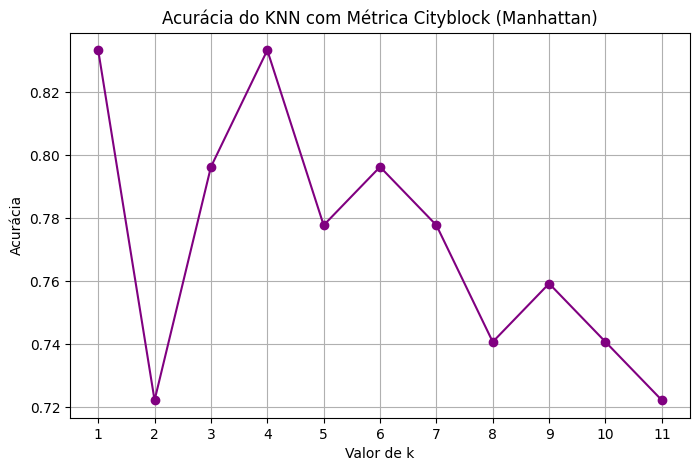

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_cityblock, marker='o', linestyle='-', color='purple')
plt.title('Acurácia do KNN com Métrica Cityblock (Manhattan)')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

K=1 resultou numa melhor acurácia

In [ ]:
best_k_chebyshev = 0
best_acc_chebyshev = 0
k_values = list(range(1, 12))
accuracies_chebyshev = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'k = {k}: Acurácia = {acc:.2f}')
    accuracies_chebyshev.append(acc)
    if acc > best_acc_chebyshev:
        best_acc_chebyshev = acc
        best_k_chebyshev = k

best_accuracies['Chebyshev'] = best_acc_chebyshev

k = 1: Acurácia = 0.70
k = 2: Acurácia = 0.67
k = 3: Acurácia = 0.72
k = 4: Acurácia = 0.72
k = 5: Acurácia = 0.67
k = 6: Acurácia = 0.69
k = 7: Acurácia = 0.72
k = 8: Acurácia = 0.67
k = 9: Acurácia = 0.70
k = 10: Acurácia = 0.70
k = 11: Acurácia = 0.70


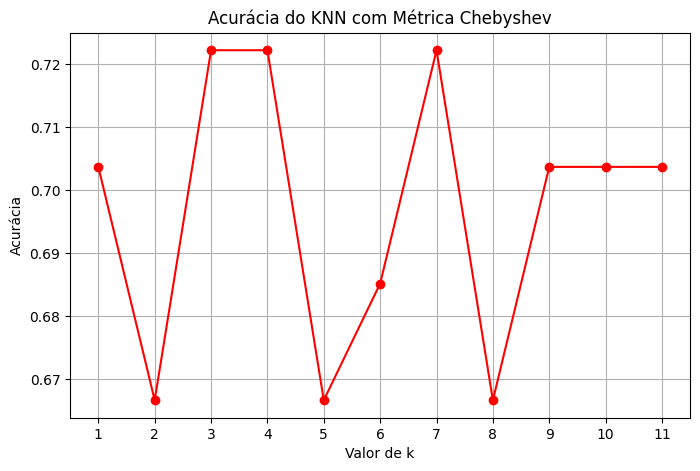

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_chebyshev, marker='o', linestyle='-', color='red')
plt.title('Acurácia do KNN com Métrica Chebyshev')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

K=3 resultou na melhor acurácia

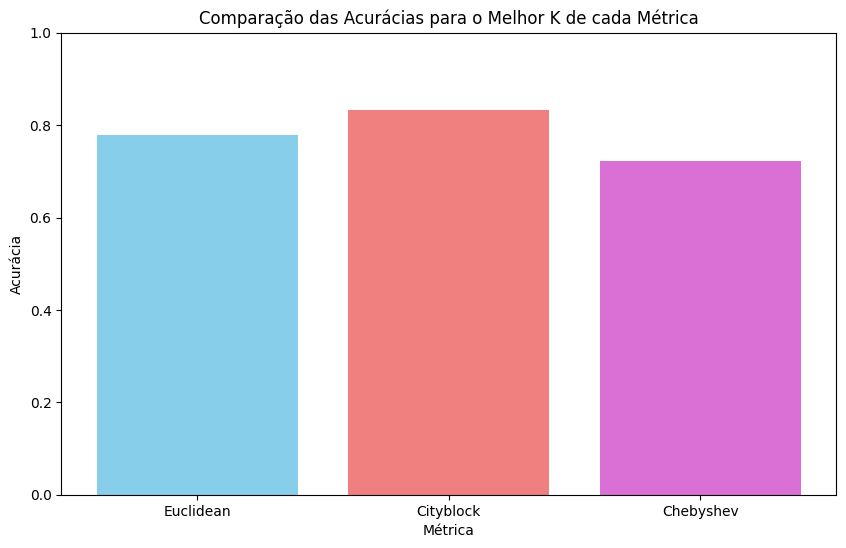

In [ ]:
metrics = list(best_accuracies.keys())
accuracies = list(best_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics, accuracies, color=['skyblue', 'lightcoral', 'orchid'])
plt.title("Comparação das Acurácias para o Melhor K de cada Métrica")
plt.xlabel("Métrica")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.show()

Portanto, a melhor métrica é Cityblocks com k = 4, agora irei selecionar essa mesma métrica a seguir


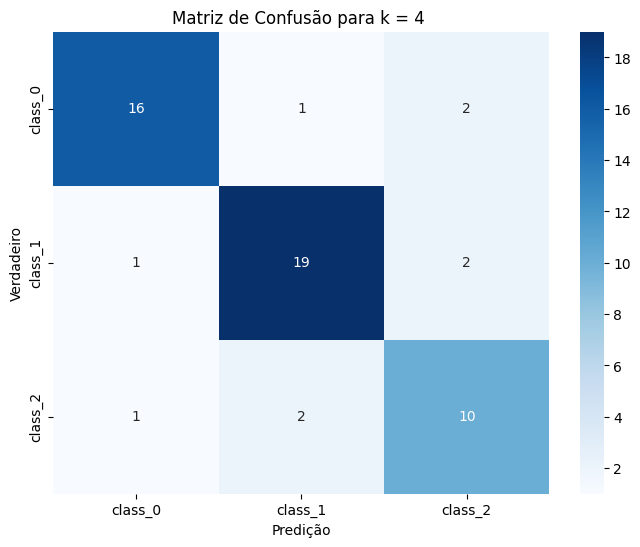

In [ ]:
best_k_cityblock = 4

knn_cityblock = KNeighborsClassifier(n_neighbors=best_k_cityblock, metric='cityblock')
knn_cityblock.fit(X_train, y_train)
y_pred_cityblock = knn_cityblock.predict(X_test)
cm_cityblock = confusion_matrix(y_test, y_pred_cityblock)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cityblock, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title(f'Matriz de Confusão para k = 4 ')
plt.show()

Vemos que a matriz gerada tem um bom número de verdadeiros positivos, o que indica que o modelo está prevendo muito bem

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for k in range(1,12):
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f'k = {k}: Acurácia = {acc:.2f}')

k = 1: Acurácia = 0.94
k = 2: Acurácia = 0.94
k = 3: Acurácia = 0.96
k = 4: Acurácia = 0.96
k = 5: Acurácia = 1.00
k = 6: Acurácia = 0.98
k = 7: Acurácia = 1.00
k = 8: Acurácia = 0.98
k = 9: Acurácia = 0.98
k = 10: Acurácia = 0.98
k = 11: Acurácia = 0.98


Ao fazer a normalização, nota-se que a acurácia melhora significativamente, atingindo seus 100% para k=5

### **Experimento 2 - LAB_3 com Naive Bayes**


Teste outras métricas para o kNN nos dados SMS Spam Collection Data Set. Qual métrica obteve a melhor acurácia?

Carregue o conjunto de dados Optical Recognition of Handwritten Digits (ORHD) do UCI Machine Learning link

lembre-se de installar a biblioteca:
!pip install ucimlrepo

Para carregar a base de dados utilize:
ORHD = fetch_ucirepo(id=80)

Pré-processe os dados:
features = ORHD.data.features.to_numpy().astype(np.float32) / 16. # normaliza para o intervalo [0, 1]

targets = ORHD.data.targets.to_numpy().astype(np.int64)

Transforme os dados (features) em valores binários:
features >= 0.5 deverá ser mapeado para 1

features < 0 deverá ser mapeado para 0

Divida os dados em 2 conjuntos: treinamento (80%) e teste (20%)

Treine um modelo Naive Bayes (Bernoulli)

Calcule as acurácias (conjunto de teste) e a matriz de confusão.

Treine um modelo k-NN nos mesmos dados Optical Recognition of Handwritten Digits (ORHD) binarizados e compare os resultados com o item 2.

Compile seus resultados em no relatório 1 (inclua as figuras e o código em PDF)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Carregamento do dataset de spam
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Visualização dos dados
print("Visualização das primeiras linhas do dataset:")
display(df.head(11))

Visualização das primeiras linhas do dataset:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# Exemplo do CountVectorizer

# Frases de treino
X_train = [
    "maçã e banana",
    "banana é boa",
    "eu gosto de maçã",
    "banana e maçã são frutas"
]

# Frases de teste
X_test = [
    "eu gosto de banana",
    "laranja é uma fruta",
    "maçã verde é azeda"
]

# Inicialização do vetor com binarização
vectorizer = CountVectorizer(binary=True)  # binary=True: CountVectorizer marca apenas se uma palavra apareceu (1) ou não apareceu (0) em um determinado documento, sem contar quantas vezes ela apareceu.

# Ajuste + transformação do treino
X_train_vec = vectorizer.fit_transform(X_train)  # matriz esparsa
print(X_train_vec)

# Somente transformação do teste com o mesmo vocabulário
X_test_vec = vectorizer.transform(X_test)       # matriz esparsa

# Criação dos DataFrames para visualização
df_train = pd.DataFrame(
    X_train_vec.toarray(),  # Transforma em matriz densa
    columns=vectorizer.get_feature_names_out(),
    index=[f"treino_{i+1}" for i in range(len(X_train))]
)

df_test = pd.DataFrame(
    X_test_vec.toarray(),   # Transforma em matriz densa
    columns=vectorizer.get_feature_names_out(),
    index=[f"teste_{i+1}" for i in range(len(X_test))]
)

# Visualizações
print("Vocabulário aprendido:")
print(vectorizer.get_feature_names_out())

print("\nMatriz binária - Dados de treino:")
display(df_train)

print("\nMatriz binária - Dados de teste:")
display(df_test)  # Usa o mesmo vocabulário aprendido no fit do treino, e ignora palavras desconhecidas

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (4, 8)>
  Coords	Values
  (0, 6)	1
  (0, 0)	1
  (1, 0)	1
  (1, 1)	1
  (2, 6)	1
  (2, 3)	1
  (2, 5)	1
  (2, 2)	1
  (3, 6)	1
  (3, 0)	1
  (3, 7)	1
  (3, 4)	1
Vocabulário aprendido:
['banana' 'boa' 'de' 'eu' 'frutas' 'gosto' 'maçã' 'são']

Matriz binária - Dados de treino:


,banana,boa,de,eu,frutas,gosto,maçã,são
treino_1,1,0,0,0,0,0,1,0
treino_2,1,1,0,0,0,0,0,0
treino_3,0,0,1,1,0,1,1,0
treino_4,1,0,0,0,1,0,1,1



Matriz binária - Dados de teste:


,banana,boa,de,eu,frutas,gosto,maçã,são
teste_1,1,0,1,1,0,1,0,0
teste_2,0,0,0,0,0,0,0,0
teste_3,0,0,0,0,0,0,1,0


In [ ]:
# Conversão das labels para valores binários
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(  # Divide dados em treino (70%) e teste (30%)
    df['message'],  # Variável independente: textos das mensagens
    df['label'],    # Variável dependente: rótulo binário
    test_size=0.3,  # Proporção de teste: 30%
    random_state=42 # Semente para reprodutibilidade dos resultados
)

# Transformação dos textos em vetores de contagem de palavras (binário)
vectorizer = CountVectorizer(binary=True)         # Inicializa o vetor com contagem binária (presença/ausência da palavra)
X_train_vec = vectorizer.fit_transform(X_train)   # Ajusta e transforma os dados de treino em vetores binários
X_test_vec = vectorizer.transform(X_test)         # Transforma os dados de teste com o mesmo vocabulário aprendido no treino

In [ ]:
feature_names = vectorizer.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_vec.toarray(),
                          columns=feature_names)
print(f'"Vocabulário aprendido:{feature_names}\n')
display(X_train_df.head())

"Vocabulário aprendido:['00' '000' '000pes' ... 'zouk' 'zyada' 'èn']



,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Colocando parte do código da aula aqui pois aproveitei algumas variáveis para fazer a atividade

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
ORHD = fetch_ucirepo(id=80)

In [ ]:
features = ORHD.data.features.to_numpy().astype(np.float32) / 16.

In [ ]:
targets = ORHD.data.targets.to_numpy().astype(np.int64)

In [ ]:
print(features.shape)

(5620, 64)


In [ ]:
print(targets.shape)

(5620, 1)


Analisei o formato para ver se são os mesmos do site

In [ ]:
accuracies = {}

In [ ]:
## Utilizando distancia de Euclides

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train_vec, y_train)
y_pred = knn.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
accuracies['Euclidiana'] = acc
print(f'Euclidiana: {acc:.2f}')

Euclidiana: 0.91


In [ ]:
## Utilizando distancia de cossenos
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train_vec, y_train)
y_pred = knn.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
accuracies['Cosine'] = acc
print(f'Cosseno: {acc:.2f}')

Cosseno: 0.98


In [ ]:
## Utilizando distância Manhattan
knn = KNeighborsClassifier(metric='cityblock')
knn.fit(X_train_vec, y_train)
y_pred = knn.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
accuracies['Cityblock'] = acc
print(f'Cityblock: {acc:.2f}')

Cityblock: 0.91


In [ ]:
print(accuracies.keys())

dict_keys(['Euclidiana', 'Cosine', 'Cityblock'])


Portanto, a melhor métrica foi a distância de cossenos

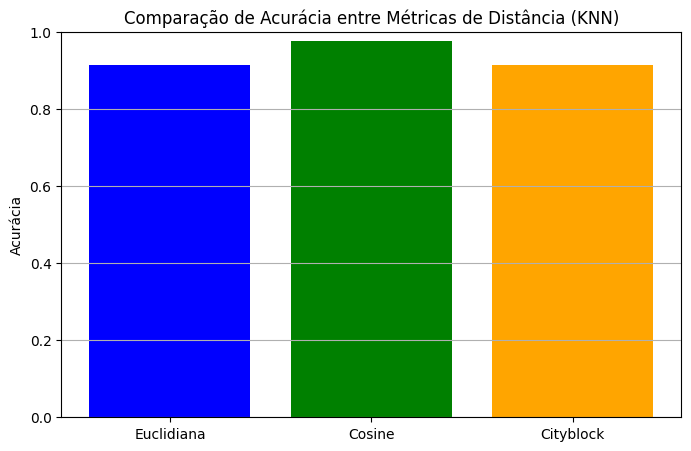

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Comparação de Acurácia entre Métricas de Distância (KNN)')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [ ]:
def one_binarize_features(features):
    return (features >= 0.5).astype(int)

In [ ]:
def zero_binarize_features(features):
    return (features < 0.5).astype(int)

In [ ]:
binarized_features = one_binarize_features(features)
print(binarized_features)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


In [ ]:
binarized_targets = zero_binarize_features(targets)
print(binarized_targets)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(binarized_features, binarized_targets, test_size = 0.2, random_state = 42)

In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
acc_bn = accuracy_score(y_test,y_pred)
display(acc_bn)

0.9928825622775801

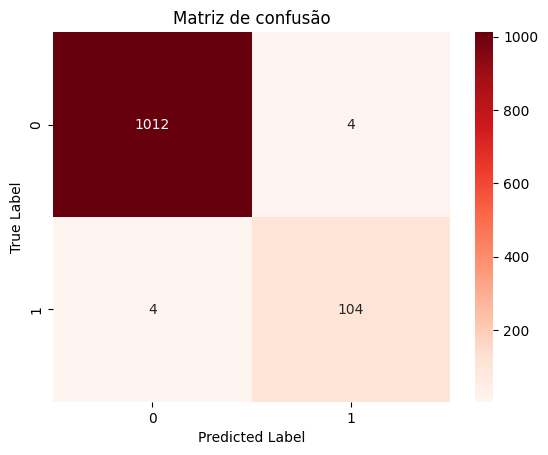

In [ ]:
conf_matrix_orhd = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_orhd, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de confusão')
plt.show()


A matriz de confusão está de acordo com o cálculo da acurácia acima

In [ ]:
knn = KNeighborsClassifier(metric = 'cosine')
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(acc_knn)

0.998220640569395


Text(0, 0.5, 'Precisão')

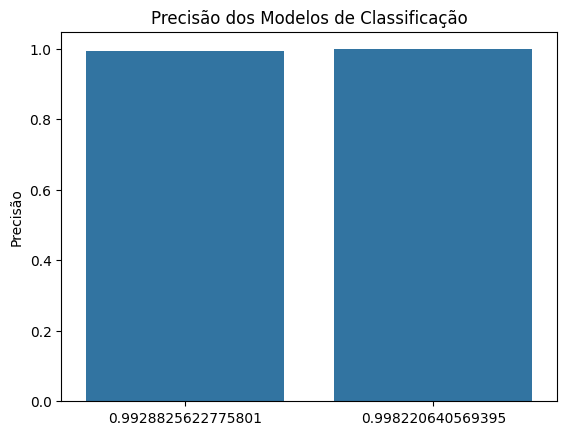

In [ ]:
graphes = [acc_knn, acc_bn]
barplot = sns.barplot(x= graphes, y = graphes)
plt.title('Precisão dos Modelos de Classificação')
plt.ylabel('Precisão')

A diferença foi mínima, porém o knn se mostrou levemente melhor

### Experimento 3 - Lab_4 com árvores de decisão

# Tarefa

1. Divida o conjunto de dados 4scenes em 3 subconjuntos disjuntos: Treinamento (70%), Validação (15%) e Teste (15%).

2. Utilize o conjunto de validação para selecionar os melhores hiperparâmetros para os seguintes algoritmos de AM:

- [k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): use o conjunto de validação para selecionar o melhor valor do hiperparâmetro k (número de vizinhos mais próximos).
- [Árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):use o conjunto de validação para selecionar o melhor valor do hiperparâmetro max_depth (profundidade da árvore).

Isto é, treine os modelos com o conjunto de treinamento e observe as suas performances no conjunto de validação para diferentes valores do hiperparâmetro em questão. Selecione a melhor configuração.

3. Treine os seguintes modelos com a união dos subconjuntos Treinamento + Validação. No caso do k-NN e da Árvore de Decisão utilize os hiperparâmetros selecionados no item anterior.
- [k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [Árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

4. Compare a performance do k-NN, do Naive Bayes e da Árvore de Decisão utilizando o conjunto de Teste e a função classification_report e também observando a matriz de confusão.

5. Compile seus resultados no relatório 1 (inclua as figuras e o código em PDF)

In [ ]:
!pip install mahotas gdown tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.7 MB/s eta 0:00:00


In [ ]:
import mahotas
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import gdown
from tqdm.auto import tqdm

In [ ]:
# função que extrai as características da imagem
def describe(image):
	# extrai a média e desvio padrão de cada canal do espaço HSV.
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()
	# converte a imagem para a escala de cinza
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	# extrai Haralick texture features
	haralick = mahotas.features.haralick(gray).mean(axis=0)
	# retorna um vetor formado por estatísticas básicas e das Haralick texture features
	return np.hstack([colorStats, haralick])  # colorStats=(6,) haralick=(13,)

In [ ]:
url = 'https://drive.google.com/file/d/1bHHgeZ3H75oigySkcZG0S98unOJNft0b/view?usp=sharing'
output = '4scenes.zip'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1bHHgeZ3H75oigySkcZG0S98unOJNft0b
From (redirected): https://drive.google.com/uc?id=1bHHgeZ3H75oigySkcZG0S98unOJNft0b&confirm=t&uuid=d279a3aa-f19b-43f3-ad49-2a4838c3e83c
To: /content/4scenes.zip
100%|██████████| 54.8M/54.8M [00:00<00:00, 137MB/s]


'4scenes.zip'

In [ ]:
!unzip -q '/content/4scenes.zip'

replace __MACOSX/._4scenes? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# construindo a base de dados a partir das features extraídas do conjunto 4scenes

imagesPath = './4scenes'
labels = []
data = []

# lista todos os nomes de arquivos presentes no diretório especificado em imagesPath
# o resultado (files) é uma lista de strings, onde cada string é o nome de um arquivo
files = os.listdir(imagesPath)

for image_name in tqdm(files, desc="[INFO] Processando imagens"):
  # extraindo o rótulo das imagens (primeira parte do nome do arquivo)
  label = image_name.split("_")[0]
  # carregando a imagem
  image = cv2.imread(imagesPath + '/' + image_name)
  # extraindo as features da imagem
  features = describe(image)
  # adicionando o rótulo da imagem (classe) em uma lista de rótulos
  labels.append(label)
  # adicionando a imagem (features) ao conjunto de dados
  data.append(features)


[INFO] Processando imagens:   0%|          | 0/1240 [00:00<?, ?it/s]

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), np.array(labels), test_size=0.3, random_state=42)

In [ ]:
valData, testData, valLabels, testLabels = train_test_split(testData, testLabels, test_size=0.5, random_state=42)

In [ ]:
melhor_k = None
melhor_acc = 0
max_k = min(40, len(trainData))
for k in range(1, max_k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    prediction = model.predict(valData)
    acc = accuracy_score(valLabels, prediction)
    print(f"k={k}, acurácia={acc:.4f}")

    if acc > melhor_acc:
        melhor_acc = acc
        melhor_k = k

print(f"\nMelhor k: {melhor_k}, com acurácia: {melhor_acc:.4f}")

k=1, acurácia=0.6129
k=2, acurácia=0.5753
k=3, acurácia=0.6344
k=4, acurácia=0.6344
k=5, acurácia=0.6505
k=6, acurácia=0.6828
k=7, acurácia=0.6505
k=8, acurácia=0.6613
k=9, acurácia=0.6774
k=10, acurácia=0.6559
k=11, acurácia=0.6828
k=12, acurácia=0.6290
k=13, acurácia=0.6237
k=14, acurácia=0.6452
k=15, acurácia=0.6398
k=16, acurácia=0.6344
k=17, acurácia=0.6344
k=18, acurácia=0.6129
k=19, acurácia=0.6237
k=20, acurácia=0.5914
k=21, acurácia=0.6129
k=22, acurácia=0.5968
k=23, acurácia=0.6022
k=24, acurácia=0.5860
k=25, acurácia=0.5914
k=26, acurácia=0.5968
k=27, acurácia=0.5699
k=28, acurácia=0.5914
k=29, acurácia=0.5860
k=30, acurácia=0.5753
k=31, acurácia=0.5699
k=32, acurácia=0.5806
k=33, acurácia=0.5591
k=34, acurácia=0.5699
k=35, acurácia=0.5538
k=36, acurácia=0.5753
k=37, acurácia=0.5914
k=38, acurácia=0.5860
k=39, acurácia=0.6075

Melhor k: 6, com acurácia: 0.6828


In [ ]:
melhor_prof = 0
melhor_acc = 0

for prof in range(1,40):
  model = DecisionTreeClassifier(max_depth= prof, random_state=42)
  model.fit(trainData, trainLabels)
  prediction = model.predict(valData)
  acc = accuracy_score(valLabels, prediction)
  print(f"max_depth={prof}, acurácia={acc:.4f}")

  if acc > melhor_acc:
    melhor_acc = acc
    melhor_prof = prof
print(f"Melhor max_depth: {melhor_prof} com acurácia {melhor_acc:.4f}")

max_depth=1, acurácia=0.6022
max_depth=2, acurácia=0.7742
max_depth=3, acurácia=0.7634
max_depth=4, acurácia=0.8280
max_depth=5, acurácia=0.8710
max_depth=6, acurácia=0.8548
max_depth=7, acurácia=0.8817
max_depth=8, acurácia=0.8548
max_depth=9, acurácia=0.8441
max_depth=10, acurácia=0.8441
max_depth=11, acurácia=0.8280
max_depth=12, acurácia=0.8226
max_depth=13, acurácia=0.8172
max_depth=14, acurácia=0.8172
max_depth=15, acurácia=0.8172
max_depth=16, acurácia=0.8172
max_depth=17, acurácia=0.8172
max_depth=18, acurácia=0.8172
max_depth=19, acurácia=0.8172
max_depth=20, acurácia=0.8172
max_depth=21, acurácia=0.8172
max_depth=22, acurácia=0.8172
max_depth=23, acurácia=0.8172
max_depth=24, acurácia=0.8172
max_depth=25, acurácia=0.8172
max_depth=26, acurácia=0.8172
max_depth=27, acurácia=0.8172
max_depth=28, acurácia=0.8172
max_depth=29, acurácia=0.8172
max_depth=30, acurácia=0.8172
max_depth=31, acurácia=0.8172
max_depth=32, acurácia=0.8172
max_depth=33, acurácia=0.8172
max_depth=34, acurá

Utilizei o k até 39, pois mostra melhor para qual valor a acurácia irá convergir de acordo com a escolha do meu hiperparâmetro. Como visto acima, temos que o melhor k é 6, e a melhor profundidade é 7

In [ ]:
trainDataUnion = np.concatenate((valData, trainData))
trainLabelsUnion = np.concatenate((valLabels, trainLabels))

In [ ]:
from sklearn.utils import shuffle
trainDataUnion, trainLabelsUnion = shuffle(trainDataUnion, trainLabelsUnion, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainDataUnion, trainLabelsUnion)
prediction = model.predict(testData)
acc = accuracy_score(testLabels, prediction)
print(acc)

0.6129032258064516


In [ ]:
model = DecisionTreeClassifier(max_depth = 11, random_state = 42)
model.fit(trainDataUnion, trainLabelsUnion)
prediction = model.predict(testData)
acc = accuracy_score(testLabels, prediction)
print(acc)

0.7688172043010753


In [ ]:
model = BernoulliNB()
model.fit(trainDataUnion, trainLabelsUnion)
prediction = model.predict(testData)
acc = accuracy_score(testLabels, prediction)
print(acc)

0.26881720430107525


Aqui vemos que a acurácia diminuiu levemente nos modelos já treinados (KNN e decision tree)

In [ ]:
modelos = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=11, random_state=42),
    "Naive Bayes": BernoulliNB()
}

In [ ]:
for nome, modelo in modelos.items():
    print("="*60)
    print(f" Avaliação do modelo: {nome}")
    modelo.fit(trainDataUnion, trainLabelsUnion)
    pred = modelo.predict(testData)

    acc = accuracy_score(testLabels, pred)
    print(f"\n Acurácia: {acc:.4f}")

    print("\n Classification Report:")
    print(classification_report(testLabels, pred))

 Avaliação do modelo: k-NN

 Acurácia: 0.6129

 Classification Report:
              precision    recall  f1-score   support

       coast       0.52      0.58      0.55        50
      forest       0.66      0.75      0.70        44
     highway       0.54      0.54      0.54        39
      street       0.76      0.58      0.66        53

    accuracy                           0.61       186
   macro avg       0.62      0.61      0.61       186
weighted avg       0.62      0.61      0.61       186

 Avaliação do modelo: Decision Tree

 Acurácia: 0.7688

 Classification Report:
              precision    recall  f1-score   support

       coast       0.71      0.74      0.73        50
      forest       0.79      0.86      0.83        44
     highway       0.75      0.62      0.68        39
      street       0.81      0.83      0.82        53

    accuracy                           0.77       186
   macro avg       0.77      0.76      0.76       186
weighted avg       0.77      0.77 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


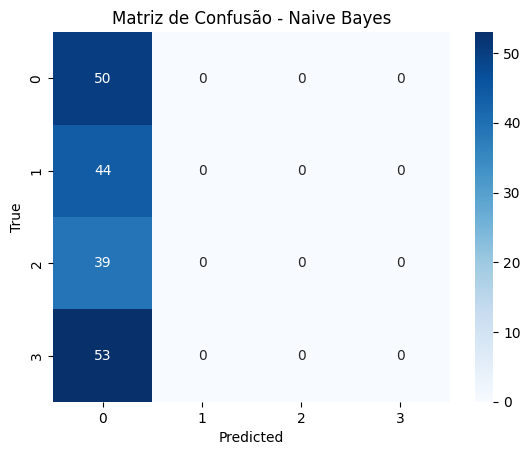

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testLabels, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão - {nome}')
plt.show()